# Turtle Soup

ДЛЯ ПОКУПКИ (ДЛЯ ПРОДАЖИ - НАОБОРОТ)
<ol>
<li>Сегодня должен быть сделан новый 20-дневный минимум — чем ниже, тем лучше.</li>
<li>Предыдущий 20-дневный минимум должен произойти по крайней мере на четыре
торговые сессии ранее. Это очень важно.</li>
<li>После того, как рынок упадет ниже <font color='#111a2e' style="background-color:#f7e98f;">предыдущего</font> 20-дневного минимума, разместите для
целей входа покупающий стоп на 5—10 тиков выше предыдущего 20-дневного минимума.
Этот покупающий стоп годится только на сегодня.</li>
<li>Если покупающий стоп исполняется, немедленно ставьте первоначальный действующий-
до-отмены продающий стоп-лосс на один тик ниже сегодняшнего минимума.</li>
<li>Когда позиция становится прибыльной, используйте плавающий стоп, чтобы
предотвратить потерю прибыли. Некоторые из этих сделок будут длиться два-три часа, а
некоторые — несколько дней. Из-за волатильности и шума 20-дневных максимумов и
минимумов каждый рынок ведет себя по-своему.</li>
<li>Правило повторного входа: если на первый или второй день существования сделки у
вас сработал стоп, вы можете войти повторно с помощью покупающего стопа на
первоначальном уровне входа (только на первый или на второй день). Это должно
несколько увеличить вашу прибыль.</li>
</ol>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(15, 9))

In [203]:
spy_df = pd.read_csv('../../../data/SPY_2002-01-01_2022-12-31_1d.csv', index_col=0, parse_dates=True)
spy_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-12-23,378.206578,381.603617,376.592742,381.454193,59857300,0.0,0.0,0.0
2022-12-27,381.334651,381.693267,378.206574,379.949921,51638200,0.0,0.0,0.0
2022-12-28,379.880163,381.932359,374.988858,375.227936,70911500,0.0,0.0,0.0
2022-12-29,378.186666,382.888722,377.638738,381.982178,66970900,0.0,0.0,0.0
2022-12-30,379.192810,381.125406,376.991191,380.975983,84022200,0.0,0.0,0.0


In [207]:
spy_close = spy_df['Close'].to_frame()
spy_close.loc['2002-01-18']

Close    75.599556
Name: 2002-01-18 00:00:00, dtype: float64

In [209]:
spy_close['20d_min'] = spy_close['Close'].rolling(window=20).min()
spy_close['20d_max'] = spy_close['Close'].rolling(window=20).max()
spy_close.dropna(inplace=True)
spy_close

,Close,20d_min,20d_max
Date,,,
2002-01-30,74.744324,73.681999,78.586159
2002-01-31,75.619598,73.681999,78.586159
2002-02-01,75.265503,73.681999,78.586159
2002-02-04,73.394707,73.394707,78.031601
2002-02-05,72.940392,72.940392,77.851181
...,...,...,...
2022-12-23,381.454193,378.575165,404.273560
2022-12-27,379.949921,378.575165,404.273560
2022-12-28,375.227936,375.227936,404.273560


In [8]:
t_points_max = spy_close[spy_close['Close'] == spy_close['20d_max']]
t_points_max

,Close,20d_min,20d_max
Date,,,
2002-03-01,75.993744,72.172012,75.993744
2002-03-04,77.336731,72.172012,77.336731
2002-03-06,78.004852,72.172012,78.004852
2002-03-08,78.165215,72.359131,78.165215
2002-03-11,78.332237,72.359131,78.332237
...,...,...,...
2022-11-10,391.392120,354.641785,391.392120
2022-11-11,395.180206,362.356781,395.180206
2022-11-22,396.558594,367.909973,396.558594


In [9]:
t_points_min = spy_close[spy_close['Close'] == spy_close['20d_min']]
t_points_min

,Close,20d_min,20d_max
Date,,,
2002-02-04,73.394707,73.394707,78.031601
2002-02-05,72.940392,72.940392,77.851181
2002-02-06,72.626343,72.626343,77.557213
2002-02-07,72.172012,72.172012,77.557213
2002-04-03,75.809418,75.809418,78.697334
...,...,...,...
2022-10-12,353.580688,353.580688,385.303406
2022-12-15,386.374390,386.374390,404.273560
2022-12-16,381.812805,381.812805,404.273560


In [10]:
spy_close['New Maximum'] = spy_close['Close'] == spy_close['20d_max']
spy_close

,Close,20d_min,20d_max,New Maximum
Date,,,,
2002-01-30,74.744324,73.681999,78.586159,False
2002-01-31,75.619598,73.681999,78.586159,False
2002-02-01,75.265503,73.681999,78.586159,False
2002-02-04,73.394707,73.394707,78.031601,False
2002-02-05,72.940392,72.940392,77.851181,False
...,...,...,...,...
2022-12-23,381.454193,378.575165,404.273560,False
2022-12-27,379.949921,378.575165,404.273560,False
2022-12-28,375.227936,375.227936,404.273560,False


In [11]:
spy_close[spy_close['New Maximum'] == True]

,Close,20d_min,20d_max,New Maximum
Date,,,,
2002-03-01,75.993744,72.172012,75.993744,True
2002-03-04,77.336731,72.172012,77.336731,True
2002-03-06,78.004852,72.172012,78.004852,True
2002-03-08,78.165215,72.359131,78.165215,True
2002-03-11,78.332237,72.359131,78.332237,True
...,...,...,...,...
2022-11-10,391.392120,354.641785,391.392120,True
2022-11-11,395.180206,362.356781,395.180206,True
2022-11-22,396.558594,367.909973,396.558594,True


In [12]:
spy_close['New Minimum'] = spy_close['Close'] == spy_close['20d_min']
spy_close

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.744324,73.681999,78.586159,False,False
2002-01-31,75.619598,73.681999,78.586159,False,False
2002-02-01,75.265503,73.681999,78.586159,False,False
2002-02-04,73.394707,73.394707,78.031601,False,True
2002-02-05,72.940392,72.940392,77.851181,False,True
...,...,...,...,...,...
2022-12-23,381.454193,378.575165,404.273560,False,False
2022-12-27,379.949921,378.575165,404.273560,False,False
2022-12-28,375.227936,375.227936,404.273560,False,True


In [13]:
spy_close[spy_close['New Minimum'] == True]

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-02-04,73.394707,73.394707,78.031601,False,True
2002-02-05,72.940392,72.940392,77.851181,False,True
2002-02-06,72.626343,72.626343,77.557213,False,True
2002-02-07,72.172012,72.172012,77.557213,False,True
2002-04-03,75.809418,75.809418,78.697334,False,True
...,...,...,...,...,...
2022-10-12,353.580688,353.580688,385.303406,False,True
2022-12-15,386.374390,386.374390,404.273560,False,True
2022-12-16,381.812805,381.812805,404.273560,False,True


In [14]:
spy_close.loc['2003-04-04']

Close          60.118851
20d_min        54.651176
20d_max        61.106949
New Maximum        False
New Minimum        False
Name: 2003-04-04 00:00:00, dtype: object

In [17]:
spy_close.shape

(5268, 5)

In [94]:
spy_close.iloc[4]

Close          72.940392
20d_min        72.940392
20d_max        77.851181
New Maximum        False
New Minimum         True
Name: 2002-02-05 00:00:00, dtype: object

In [19]:
spy_close

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2002-01-30,74.744324,73.681999,78.586159,False,False
2002-01-31,75.619598,73.681999,78.586159,False,False
2002-02-01,75.265503,73.681999,78.586159,False,False
2002-02-04,73.394707,73.394707,78.031601,False,True
2002-02-05,72.940392,72.940392,77.851181,False,True
...,...,...,...,...,...
2022-12-23,381.454193,378.575165,404.273560,False,False
2022-12-27,379.949921,378.575165,404.273560,False,False
2022-12-28,375.227936,375.227936,404.273560,False,True


In [24]:
spy_close_min = spy_close[spy_close['New Minimum'] == True]
spy_close_max = spy_close[spy_close['New Maximum'] == True]

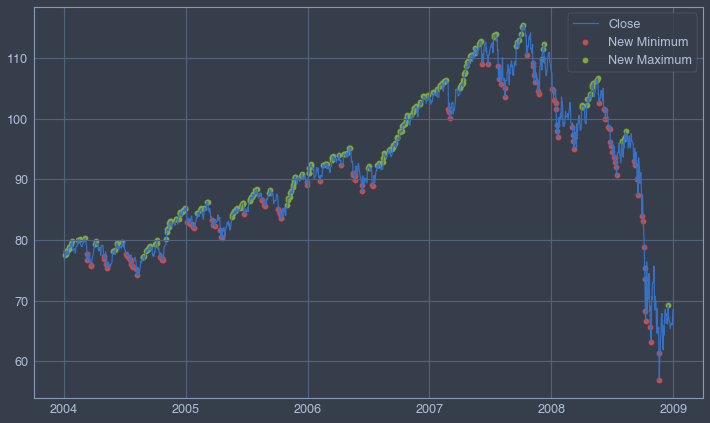

In [51]:
fig, ax = plt.subplots()
ax.plot(spy_close.loc['2004':'2008'].index, spy_close.loc['2004':'2008']['Close'], label='Close')
ax.scatter(spy_close_min.loc['2004':'2008'].index, spy_close_min.loc['2004':'2008']['Close'], label='New Minimum', c='r')
ax.scatter(spy_close_max.loc['2004':'2008'].index, spy_close_max.loc['2004':'2008']['Close'], label='New Maximum', c='g')
ax.grid(True)
plt.legend()

In [206]:
dr = pd.date_range(spy_close.iloc[10].name, periods=4, freq='B')[::-1]
dr

DatetimeIndex(['2002-01-21', '2002-01-18', '2002-01-17', '2002-01-16'], dtype='datetime64[ns]', freq='-1B')

In [202]:
len(spy_close.loc[dr]['New Minimum'][spy_close.loc[dr]['New Minimum']])

0

In [82]:
spy_position = spy_close.loc['2004':'2008'].copy()
spy_position

,Close,20d_min,20d_max,New Maximum,New Minimum
Date,,,,,
2004-01-02,76.726021,73.275681,76.760483,False,False
2004-01-05,77.560654,73.275681,77.560654,True,False
2004-01-06,77.636543,73.275681,77.636543,True,False
2004-01-07,77.898643,73.275681,77.898643,True,False
2004-01-08,78.209099,73.275681,78.209099,True,False
...,...,...,...,...,...
2008-12-24,65.856522,61.896313,69.261162,False,False
2008-12-26,66.236458,61.896313,69.261162,False,False
2008-12-29,66.046501,61.896313,69.261162,False,False


In [ ]:
spy_close.loc['2004':'2008']

In [130]:
prepare = False
def turtle_soup(data):
    global prepare
    previous_4_days_period_minimums = pd.date_range(data.name, periods=4, freq='B')[::-1]
    return previous_4_days_period_minimums
#     if data['New Minimum'] and len(previous_4_days_period_minimums) == 0:
#         if current_price < previous_minimum:
#             prepare = True
#             order_buy_limit = previous_minimum + 5
#             order_stop_loss = current_price - 1
#     if prepare and current_price == order_buy_limit:
#         position = 1
#     if prepare and current_price == order_stop_loss:
#         position = 0
#         prepare = False

In [131]:
spy_position['position'] = spy_position[4:].apply(turtle_soup, axis=1)
spy_position.dropna()

,Close,20d_min,20d_max,New Maximum,New Minimum,position
Date,,,,,,
2004-01-08,78.209099,73.275681,78.209099,True,False,"DatetimeIndex(['2004-01-13', '2004-01-12', '20..."
2004-01-09,77.526176,73.873016,78.209099,False,False,"DatetimeIndex(['2004-01-14', '2004-01-13', '20..."
2004-01-12,78.098701,73.873016,78.209099,False,False,"DatetimeIndex(['2004-01-15', '2004-01-14', '20..."
2004-01-13,77.643425,73.873016,78.209099,False,False,"DatetimeIndex(['2004-01-16', '2004-01-15', '20..."
2004-01-14,78.291824,74.257439,78.291824,True,False,"DatetimeIndex(['2004-01-19', '2004-01-16', '20..."
...,...,...,...,...,...,...
2008-12-24,65.856522,61.896313,69.261162,False,False,"DatetimeIndex(['2008-12-29', '2008-12-26', '20..."
2008-12-26,66.236458,61.896313,69.261162,False,False,"DatetimeIndex(['2008-12-31', '2008-12-30', '20..."
2008-12-29,66.046501,61.896313,69.261162,False,False,"DatetimeIndex(['2009-01-01', '2008-12-31', '20..."
